<a href="https://colab.research.google.com/github/Ice-CreamAT/Street/blob/main/Street.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [2]:
from google.colab import drive # It is necessary to connect the database in Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/My Drive/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [9]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)


In [10]:
train


{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [11]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation, y_validation = valid['features'], valid['labels']

In [12]:
X_train.shape

(34799, 32, 32, 3)

In [13]:
y_train.shape

(34799,)

In [15]:
X_test.shape

(12630, 32, 32, 3)

In [16]:
X_validation.shape

(4410, 32, 32, 3)

1

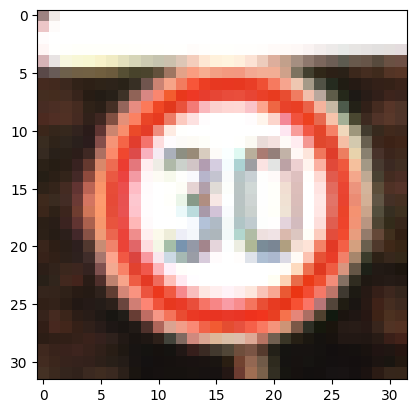

In [20]:
i =3000
plt.imshow(X_train[i])
y_train[i]

36

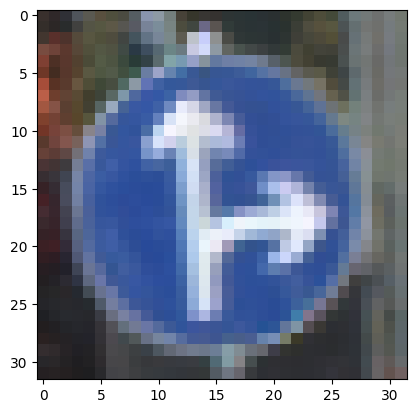

In [22]:
i = 3001
plt.imshow(X_test[i])
y_test[i]

In [23]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [24]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis = 3, keepdims=True)

In [25]:
X_train_gray.shape

(34799, 32, 32, 1)

In [26]:
X_test_gray.shape

(12630, 32, 32, 1)

In [27]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [28]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [29]:
np.max(X_train_gray_norm)

0.9921875

In [30]:
np.min(X_train_gray_norm)

-0.9713541666666666

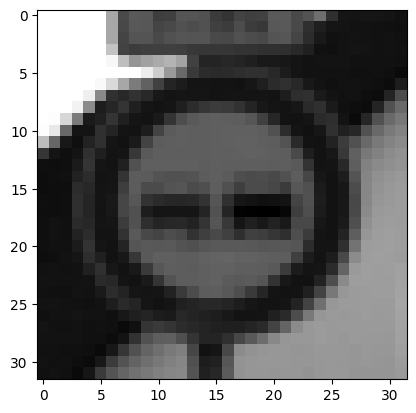

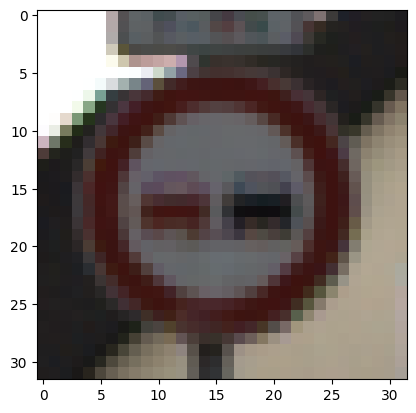

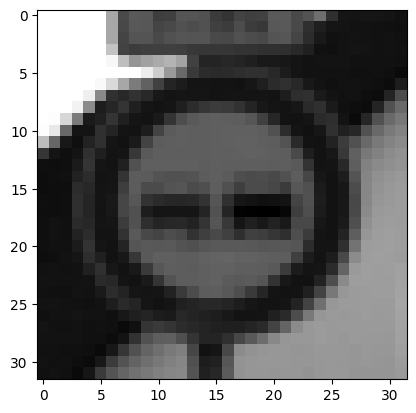

In [31]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

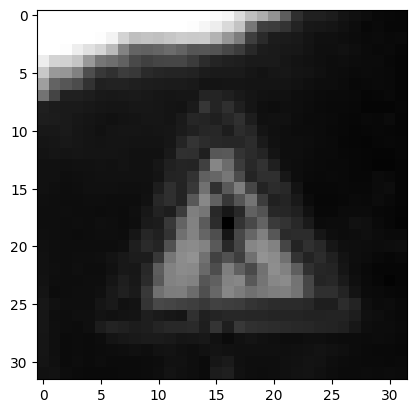

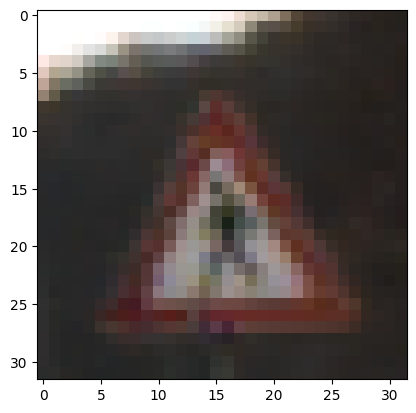

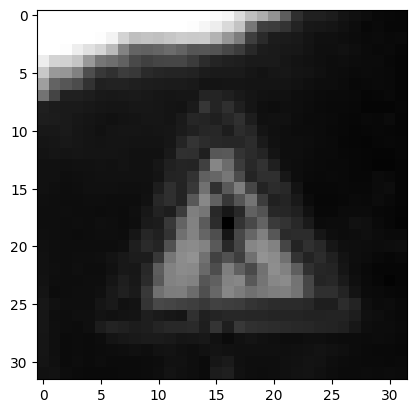

In [32]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

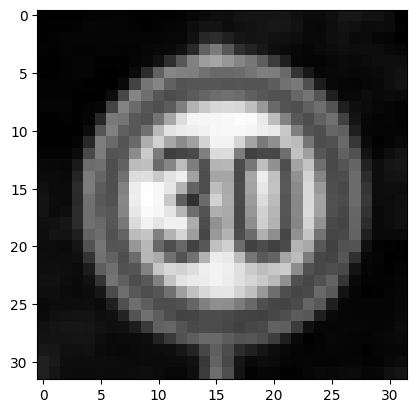

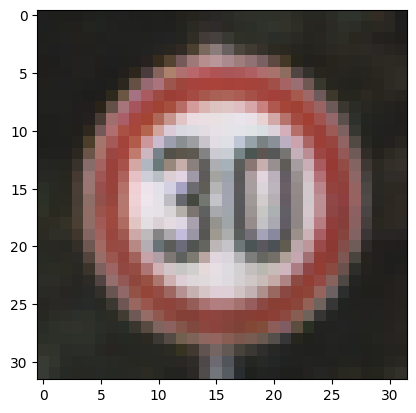

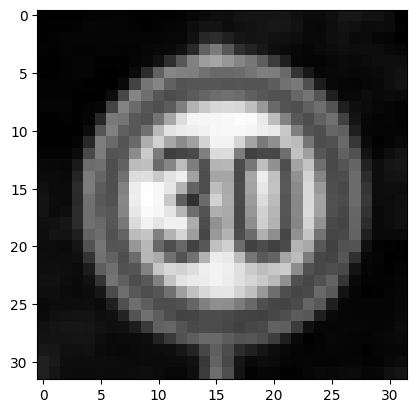

In [33]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

In [34]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [35]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [36]:
history = LeNet.fit(X_train_gray_norm, y_train,
                    batch_size = 500,
                    epochs = 50,
                    validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 24s 326ms/step - loss: 3.0985 - accuracy: 0.1889 - val_loss: 2.6117 - val_accuracy: 0.3354
Epoch 2/50
70/70 [==============================] - 20s 285ms/step - loss: 1.6489 - accuracy: 0.5420 - val_loss: 1.5099 - val_accuracy: 0.5492
Epoch 3/50
70/70 [==============================] - 20s 284ms/step - loss: 0.9670 - accuracy: 0.7166 - val_loss: 1.1228 - val_accuracy: 0.6753
Epoch 4/50
70/70 [==============================] - 22s 318ms/step - loss: 0.6863 - accuracy: 0.8049 - val_loss: 0.9901 - val_accuracy: 0.7166
Epoch 5/50
70/70 [==============================] - 20s 283ms/step - loss: 0.5402 - accuracy: 0.8497 - val_loss: 0.8763 - val_accuracy: 0.7626
Epoch 6/50
70/70 [==============================] - 19s 277ms/step - loss: 0.4460 - accuracy: 0.8774 - val_loss: 0.7942 - val_accuracy: 0.7909
Epoch 7/50
70/70 [==============================] - 22s 317ms/step - loss: 0.3841 - accuracy: 0.8976 - val_loss: 0.7389 - val_accuracy: 0.7971

In [37]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 5s 13ms/step - loss: 1.3655 - accuracy: 0.8534
Test Accuracy: 0.8533650040626526


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [40]:
val_accuracy

[0.3353741466999054,
 0.5492063760757446,
 0.6752834320068359,
 0.716553270816803,
 0.7625850439071655,
 0.7909297347068787,
 0.7970521450042725,
 0.8115646243095398,
 0.8088435530662537,
 0.817913830280304,
 0.8251700401306152,
 0.821088433265686,
 0.8106576204299927,
 0.8124716281890869,
 0.8335601091384888,
 0.821541965007782,
 0.8299319744110107,
 0.8342403769493103,
 0.8283446431159973,
 0.8251700401306152,
 0.8185940980911255,
 0.8299319744110107,
 0.8312925100326538,
 0.8238095045089722,
 0.8315192461013794,
 0.8367347121238708,
 0.8369614481925964,
 0.839455783367157,
 0.8104308247566223,
 0.8435373902320862,
 0.8283446431159973,
 0.8385487794876099,
 0.8437641859054565,
 0.8476190567016602,
 0.8480725884437561,
 0.8374149799346924,
 0.8417233824729919,
 0.8462585210800171,
 0.8494331240653992,
 0.8283446431159973,
 0.8505668640136719,
 0.8473922610282898,
 0.8446711897850037,
 0.8392290472984314,
 0.8507936596870422,
 0.8337868452072144,
 0.8424036502838135,
 0.845124721527099

<ipython-input-41-46d7eff3f114>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')


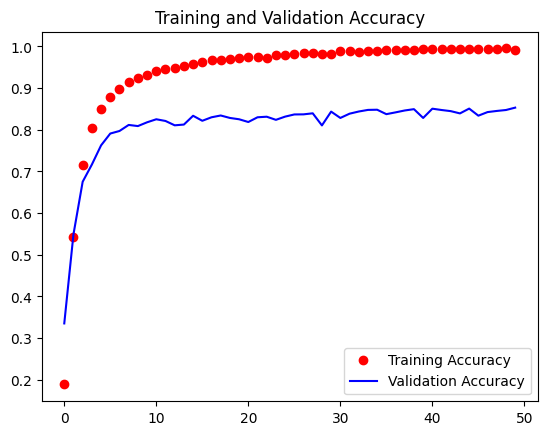

In [41]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

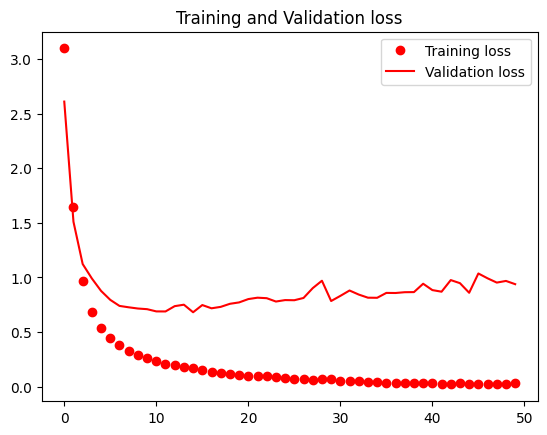

In [42]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [43]:
predict_x = LeNet.predict(X_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

395/395 [==============================] - 5s 12ms/step


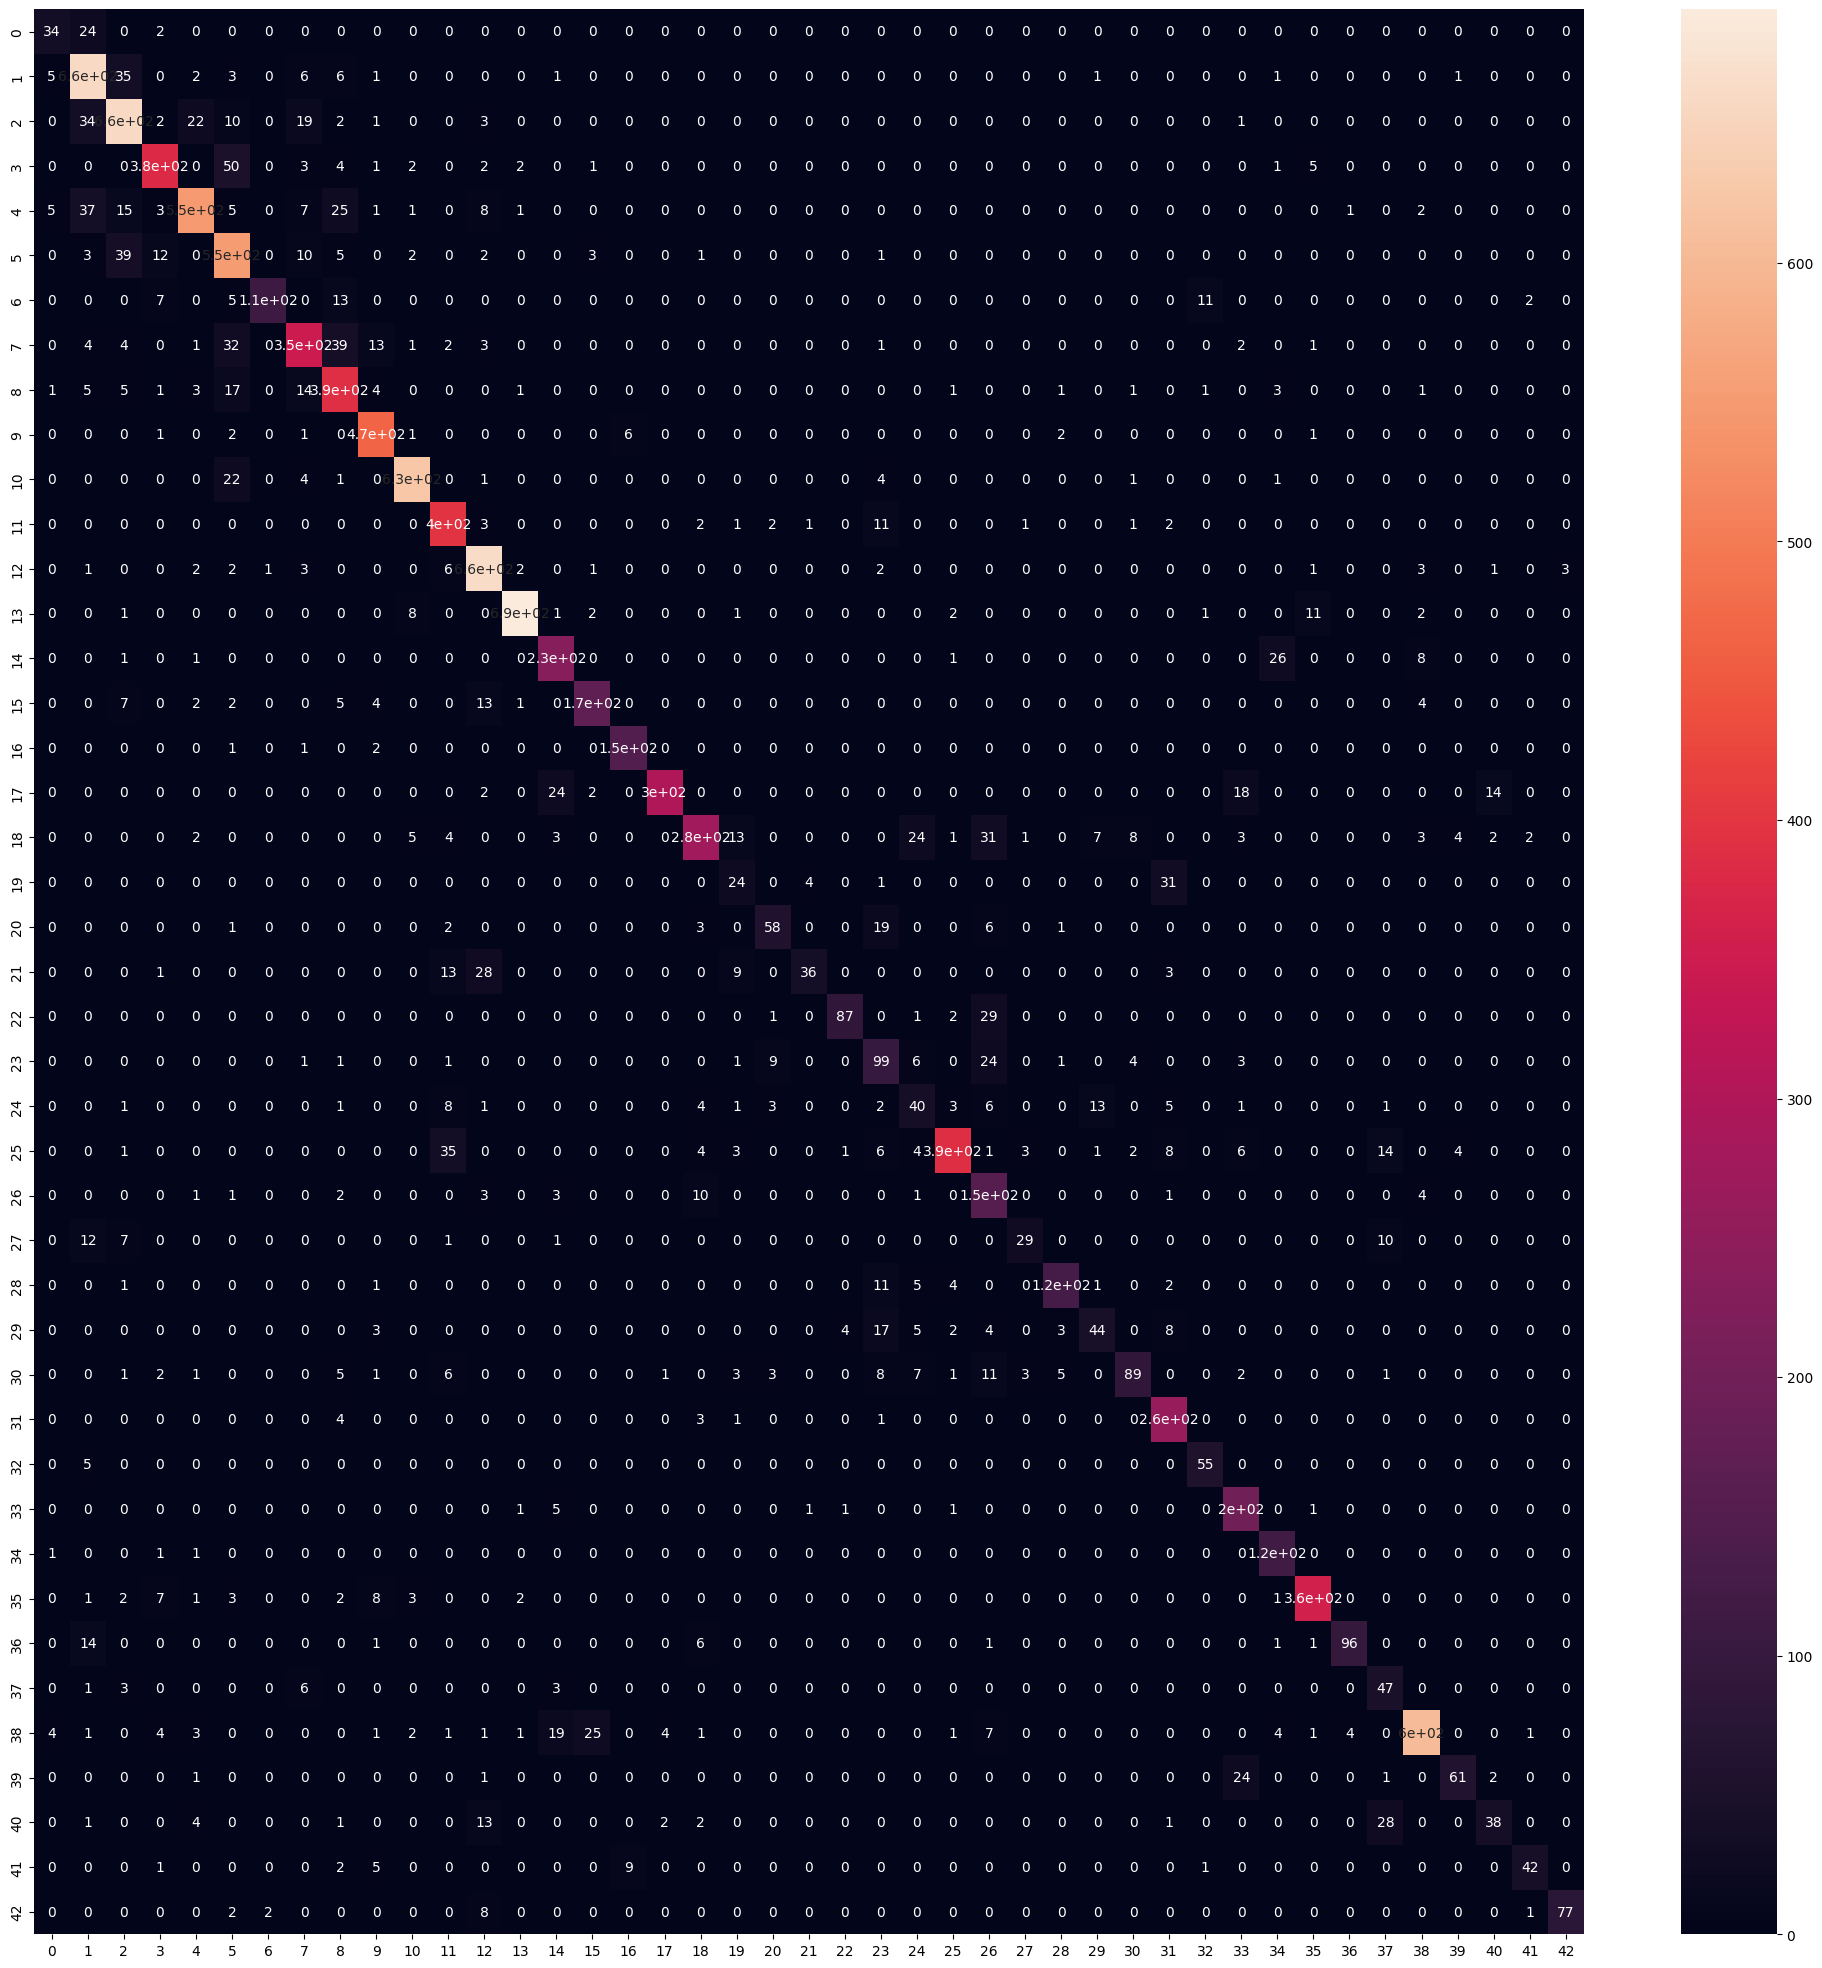

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

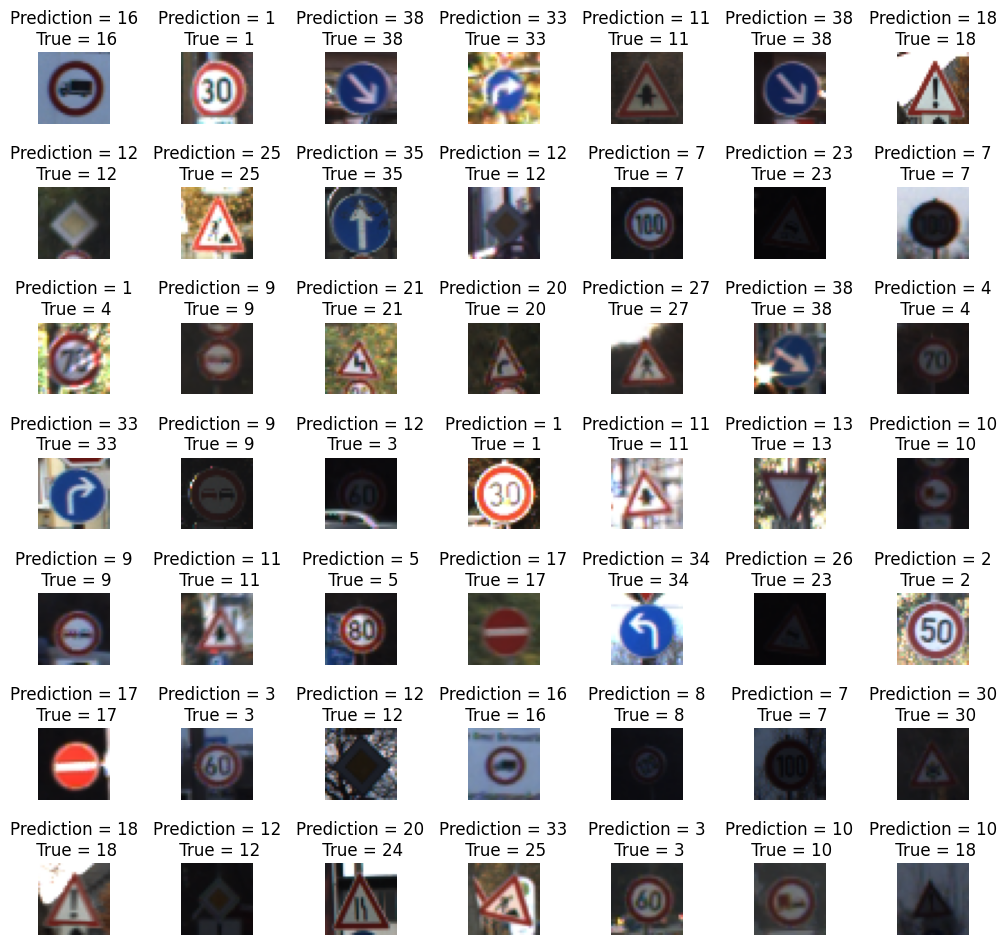

In [45]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    